# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | This is a route I fly regula...
1,✅ Trip Verified | While BA may have made some...
2,✅ Trip Verified | British Airways new Club Sui...
3,"✅ Trip Verified | Four very pleasant, on time..."
4,Not Verified | We travel extensively over 25...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Cleaning the text

In [5]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,✅ Trip Verified | This is a route I fly regula...,Trip Verified This is a route I fly regularly...
1,✅ Trip Verified | While BA may have made some...,Trip Verified While BA may have made some pos...
2,✅ Trip Verified | British Airways new Club Sui...,Trip Verified British Airways new Club Suite ...
3,"✅ Trip Verified | Four very pleasant, on time...",Trip Verified Four very pleasant on time flig...
4,Not Verified | We travel extensively over 25...,Not Verified We travel extensively over years ...


Tokenization - 
Tokenization involves splitting text into smaller segments called tokens. This can be done at the sentence level (sentence tokenization) or the word level (word tokenization).

POS Tagging - 
Parts of Speech (POS) tagging converts each token into a tuple with the format (word, tag). This step is vital for maintaining the context of the word and is crucial for Lemmatization.

Removing Stopwords - 
Stopwords are common words in English that carry minimal meaningful information. As part of text preprocessing, these should be removed. The NLTK library provides a comprehensive list of stopwords for various languages.

Extracting Stem Words - 
A stem represents the core meaning of a word. The two primary methods for extracting stem words are Stemming and Lemmatization.

The main difference is that Stemming can result in non-meaningful root words by simply cutting off certain characters at the end. In contrast, Lemmatization produces meaningful root words but requires the POS tags for accurate results.

About NLTK - 
NLTK, or Natural Language Toolkit, is a powerful platform for building Python applications that process and analyze human language data.

It offers easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a comprehensive suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, and provides wrappers for advanced NLP libraries.

In [6]:
!pip install nltk
import nltk # type: ignore

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to C:\Users\Shubh
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Shubh
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Shubh
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to C:\Users\Shubh
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shubh Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,✅ Trip Verified | This is a route I fly regula...,Trip Verified This is a route I fly regularly...,"[(Trip, n), (Verified, n), (route, n), (fly, v..."
1,✅ Trip Verified | While BA may have made some...,Trip Verified While BA may have made some pos...,"[(Trip, n), (Verified, n), (BA, n), (may, None..."
2,✅ Trip Verified | British Airways new Club Sui...,Trip Verified British Airways new Club Suite ...,"[(Trip, n), (Verified, n), (British, n), (Airw..."
3,"✅ Trip Verified | Four very pleasant, on time...",Trip Verified Four very pleasant on time flig...,"[(Trip, n), (Verified, n), (Four, n), (pleasan..."
4,Not Verified | We travel extensively over 25...,Not Verified We travel extensively over years ...,"[(Verified, v), (travel, v), (extensively, r),..."


In [8]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,✅ Trip Verified | This is a route I fly regula...,Trip Verified This is a route I fly regularly...,"[(Trip, n), (Verified, n), (route, n), (fly, v...",Trip Verified route fly regularly Used first...
1,✅ Trip Verified | While BA may have made some...,Trip Verified While BA may have made some pos...,"[(Trip, n), (Verified, n), (BA, n), (may, None...",Trip Verified BA may make positive improveme...
2,✅ Trip Verified | British Airways new Club Sui...,Trip Verified British Airways new Club Suite ...,"[(Trip, n), (Verified, n), (British, n), (Airw...",Trip Verified British Airways new Club Suite...
3,"✅ Trip Verified | Four very pleasant, on time...",Trip Verified Four very pleasant on time flig...,"[(Trip, n), (Verified, n), (Four, n), (pleasan...",Trip Verified Four pleasant time flight frie...
4,Not Verified | We travel extensively over 25...,Not Verified We travel extensively over years ...,"[(Verified, v), (travel, v), (extensively, r),...",Verified travel extensively year tend use BA...


In [9]:
df[['reviews','Lemma']]

,reviews,Lemma
0,✅ Trip Verified | This is a route I fly regula...,Trip Verified route fly regularly Used first...
1,✅ Trip Verified | While BA may have made some...,Trip Verified BA may make positive improveme...
2,✅ Trip Verified | British Airways new Club Sui...,Trip Verified British Airways new Club Suite...
3,"✅ Trip Verified | Four very pleasant, on time...",Trip Verified Four pleasant time flight frie...
4,Not Verified | We travel extensively over 25...,Verified travel extensively year tend use BA...
...,...,...
995,✅ Trip Verified | Sofia to Belfast via London...,Trip Verified Sofia Belfast via London legro...
996,✅ Trip Verified | Lima to Gatwick. Helpful an...,Trip Verified Lima Gatwick Helpful courteous...
997,✅ Trip Verified | Inverness to Auckland via Si...,Trip Verified Inverness Auckland via Singapo...
998,✅ Trip Verified | I was seated right next to t...,Trip Verified seat right next galley lavator...


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [10]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,✅ Trip Verified | This is a route I fly regula...,Trip Verified This is a route I fly regularly...,"[(Trip, n), (Verified, n), (route, n), (fly, v...",Trip Verified route fly regularly Used first...,0.9571,Positive
1,✅ Trip Verified | While BA may have made some...,Trip Verified While BA may have made some pos...,"[(Trip, n), (Verified, n), (BA, n), (may, None...",Trip Verified BA may make positive improveme...,0.9169,Positive
2,✅ Trip Verified | British Airways new Club Sui...,Trip Verified British Airways new Club Suite ...,"[(Trip, n), (Verified, n), (British, n), (Airw...",Trip Verified British Airways new Club Suite...,0.6597,Positive
3,"✅ Trip Verified | Four very pleasant, on time...",Trip Verified Four very pleasant on time flig...,"[(Trip, n), (Verified, n), (Four, n), (pleasan...",Trip Verified Four pleasant time flight frie...,0.5759,Positive
4,Not Verified | We travel extensively over 25...,Not Verified We travel extensively over years ...,"[(Verified, v), (travel, v), (extensively, r),...",Verified travel extensively year tend use BA...,-0.6549,Negative


In [11]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    473
Negative    419
Neutral     108
Name: Analysis, dtype: int64

# Visual Representation

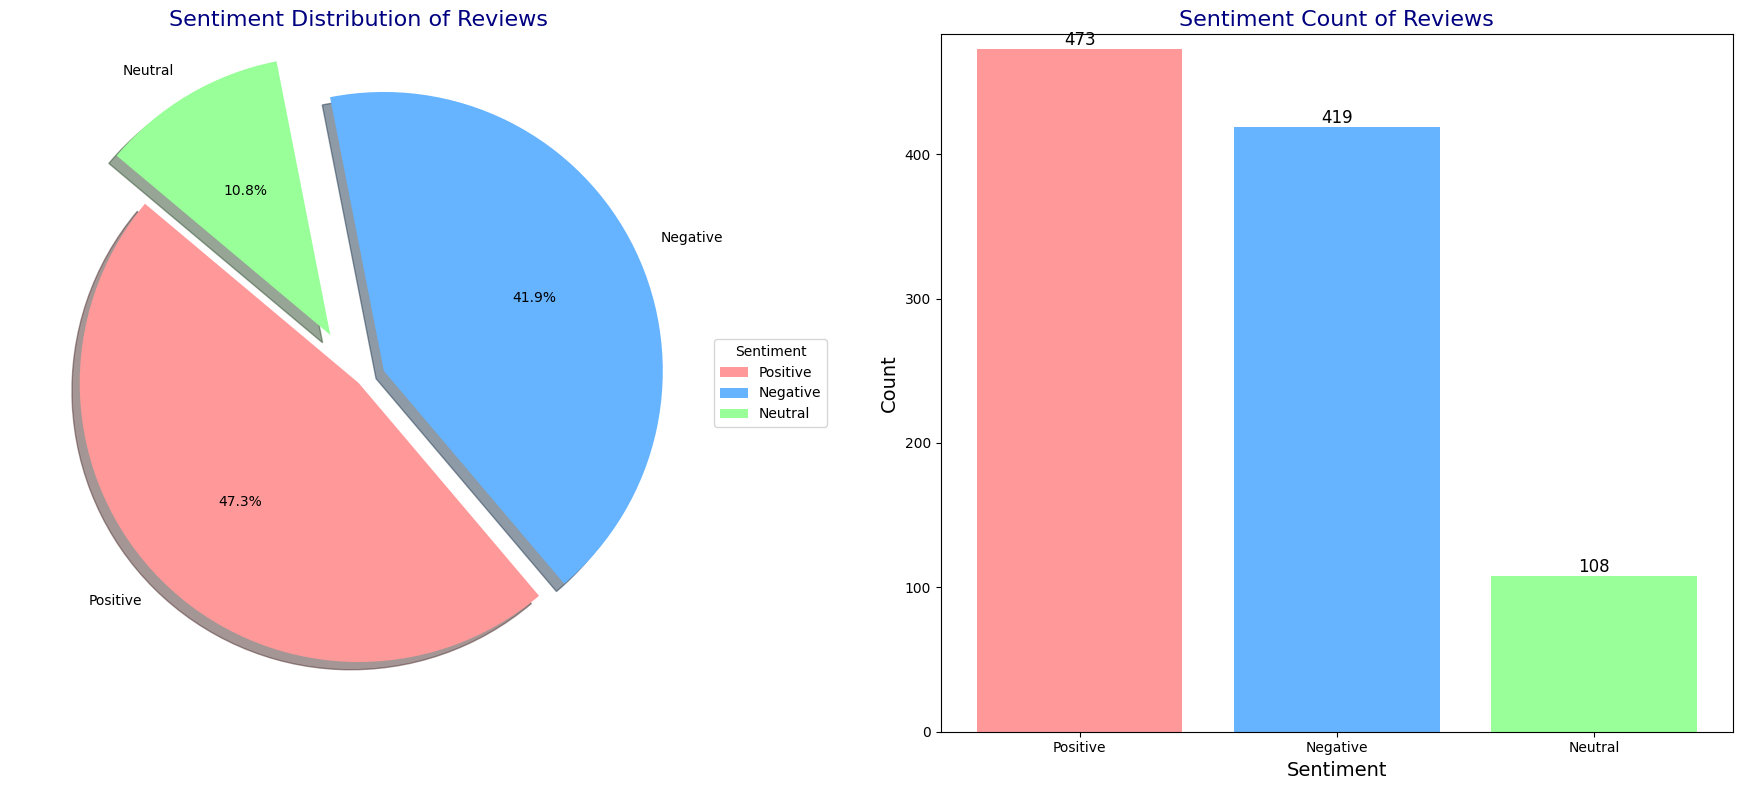

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
plt.title("Sentiment Distribution of Reviews", fontsize=16, color='navy')
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(vader_counts.values, labels=vader_counts.index, explode=(0, 0.1, 0.2), autopct='%1.1f%%', shadow=True, colors=colors, startangle=140)
plt.legend(vader_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Subplot for the bar chart
plt.subplot(1, 2, 2)
plt.title("Sentiment Count of Reviews", fontsize=16, color='navy')
bars = plt.bar(vader_counts.index, vader_counts.values, color=colors)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.ylim(0, max(vader_counts.values) + 10)

for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()


# Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


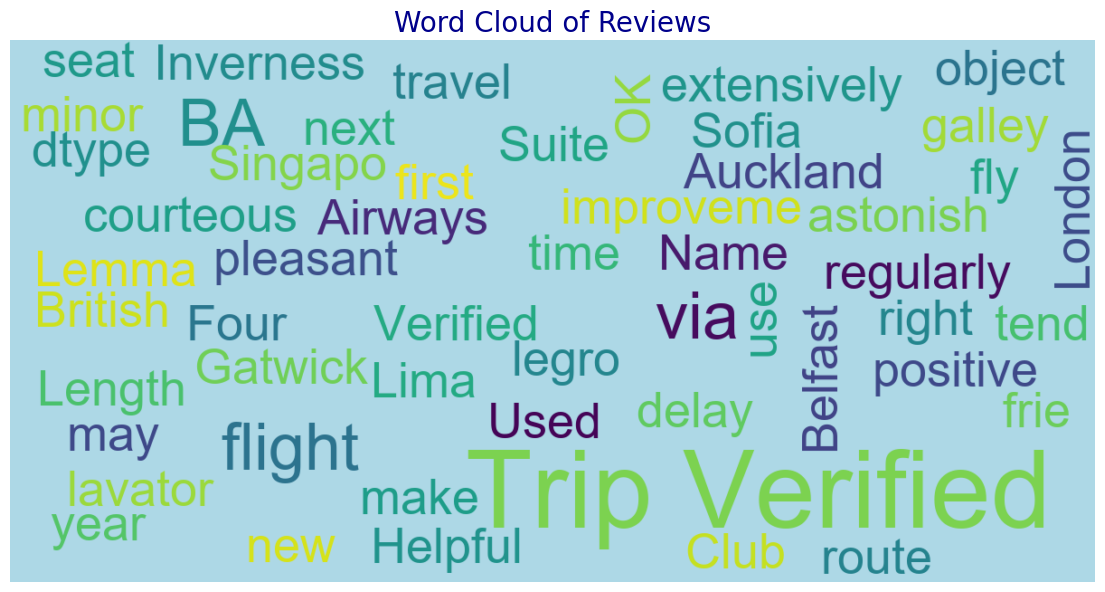

In [13]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

def show_wordcloud(data, title="Word Cloud of Reviews"):
    wordcloud = WordCloud(
        background_color='lightblue',
        stopwords=stopwords,
        max_words=150,
        max_font_size=40,
        scale=3,
        random_state=1,
        colormap='viridis',
        font_path='arial.ttf'
    ).generate(str(data))

    fig = plt.figure(1, figsize=(14, 10))
    plt.axis('off')

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20, color='darkblue')
    plt.show()

show_wordcloud(df.Lemma)